# Анализ и предобработка данных

В этом ноутбуке:
- Масштабируем числовой признак (`GRE Score`) с помощью MinMaxScaler.
- Преобразуем категориальный признак (`University Rating`) двумя способами: Label Encoding и One-Hot Encoding.
- Строим график Jointplot для пары признаков.
- Объясняем выбор каждого метода.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
# Загрузка данных
df = pd.read_csv('data/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Масштабирование числового признака

**Метод:** `MinMaxScaler`

**Почему:** Приводит значения признака к диапазону от 0 до 1. Это важно для алгоритмов, чувствительных к масштабу данных, таких как градиентный спуск, K-ближайших соседей, SVM и др.

In [3]:
# Масштабируем признак GRE Score
scaler = MinMaxScaler()
df['GRE Score Scaled'] = scaler.fit_transform(df[['GRE Score']])

# Сравним оригинальные и масштабированные значения
df[['GRE Score', 'GRE Score Scaled']].head()

,GRE Score,GRE Score Scaled
0,337,0.94
1,324,0.68
2,316,0.52
3,322,0.64
4,314,0.48


## Преобразование категориального признака `University Rating`

Хотя `University Rating` представлен числами, будем считать его категориальным признаком для демонстрации методов кодирования.

### Метод 1: Label Encoding
- Преобразует каждую категорию в уникальное целое число.
- **Плюсы:** просто и быстро.
- **Минусы:** вводит порядок между категориями, которого может не быть.

In [4]:
# Label Encoding
label_encoder = LabelEncoder()
df['University Rating Label'] = label_encoder.fit_transform(df['University Rating'])
df[['University Rating', 'University Rating Label']].head()

,University Rating,University Rating Label
0,4,3
1,4,3
2,3,2
3,3,2
4,2,1


### Метод 2: One Hot Encoding
- Преобразует каждую категорию в отдельный бинарный столбец.
- **Плюсы:** не вводит ложного порядка между категориями.
- **Минусы:** увеличивает размерность данных.

In [5]:
# One Hot Encoding
df_ohe = pd.get_dummies(df['University Rating'], prefix='UnivRating')
df = pd.concat([df, df_ohe], axis=1)
df[['University Rating'] + list(df_ohe.columns)].head()

,University Rating,UnivRating_1,UnivRating_2,UnivRating_3,UnivRating_4,UnivRating_5
0,4,False,False,False,True,False
1,4,False,False,False,True,False
2,3,False,False,True,False,False
3,3,False,False,True,False,False
4,2,False,True,False,False,False


## Построение Jointplot

Визуализируем взаимосвязь между двумя числовыми признаками: `GRE Score` и `Chance of Admit`.

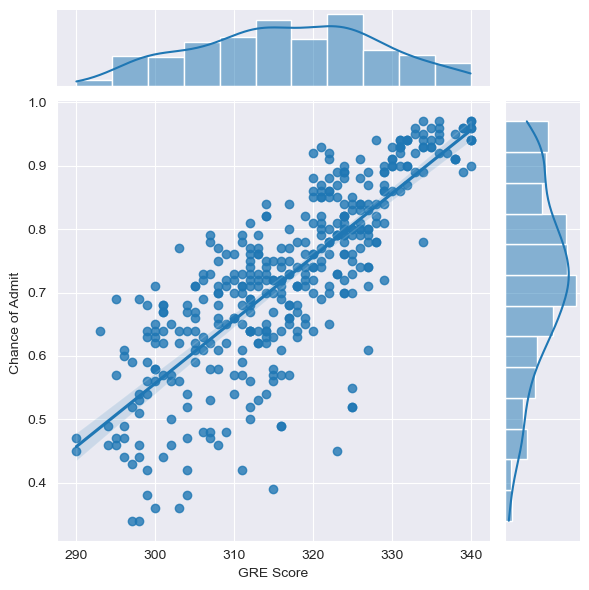

In [6]:
# Построение графика совместного распределения
sns.jointplot(data=df, x='GRE Score', y='Chance of Admit ', kind='reg', height=6)
plt.show()